## Observations and Insights 

Observations

1. Ramicane and Capomulin seem to have the most positive correlation on lowering tumor volume over the course of the trial.
2. The study was almost evenly split between male and female mice.
3. There is a positive correlation between mouse weight and tumor volume in a mouse treated with Capomulin. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice
group_data = data.groupby('Mouse ID')
total_mice = group_data['Mouse ID'].nunique().sum()
total_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = data.duplicated(['Mouse ID', 'Timepoint'], keep=False)
data.loc[duplicates == True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data.drop(data[data['Mouse ID'] == 'g989'].index, inplace = True)


In [7]:
# Checking the number of mice in the clean DataFrame.
total_mice = data['Mouse ID'].nunique()
total_mice

248

## Summary Statistics

In [8]:
data.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = np.mean(data['Tumor Volume (mm3)'])
median = np.median(data['Tumor Volume (mm3)'])
variance = np.var(data['Tumor Volume (mm3)'], ddof=0)
st_dev = np.std(data['Tumor Volume (mm3)'], ddof=0)
standard_errors = st.sem(data['Tumor Volume (mm3)'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_data = data.groupby('Drug Regimen')
group_mean = grouped_data['Tumor Volume (mm3)'].mean()
group_median = grouped_data['Tumor Volume (mm3)'].median()
group_variance = grouped_data['Tumor Volume (mm3)'].var()
group_st_dev = grouped_data['Tumor Volume (mm3)'].std()
group_standard_errors = grouped_data['Tumor Volume (mm3)'].sem()

summary_group = pd.DataFrame({"Mean": group_mean, 
                               "Median": group_median, 
                               "Variance": group_variance,
                               "Standard Deviation": group_st_dev,
                               "SEM": group_standard_errors})
summary_group

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
grouped_data['Tumor Volume (mm3)'].agg([np.mean, np.median, np.var, np.std, st.sem])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

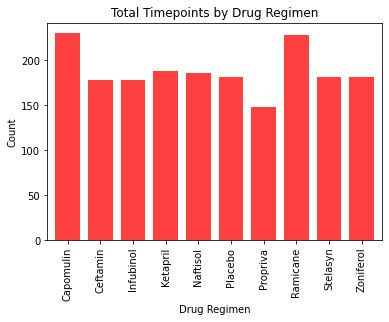

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = grouped_data['Timepoint'].count()
timepoints
timepoint_chart = timepoints.plot(kind='bar', title="Total Timepoints by Drug Regimen", color='red', 
                                  alpha=.75, ylabel='Count', width=.75)

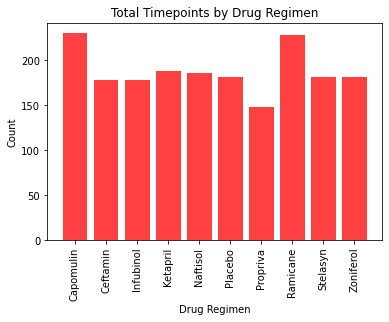

In [49]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# define x axis
x_axis = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']

plt.title("Total Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

plt.bar(x_axis, timepoints, color="red", alpha=0.75)
plt.xticks(rotation=90)
plt.show()


<AxesSubplot:title={'center':'Mouse Distribution by Gender'}, ylabel='Mouse ID'>

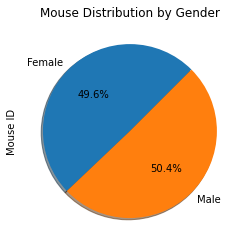

In [238]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# create groupby by Sex
gender_data = pd.DataFrame(data.groupby(['Sex']).nunique())

gender_data = gender_data['Mouse ID']
gender_data.plot(kind='pie', autopct="%1.1f%%", title='Mouse Distribution by Gender', startangle=45, shadow=True)

In [235]:
gender_data

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

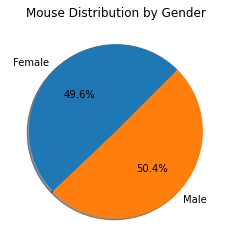

In [242]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#define labels
labels = ['Female', 'Male']
#plot pie chart
plt.pie(gender_data,autopct="%1.1f%%",startangle=45, shadow=True, labels=labels)
plt.title('Mouse Distribution by Gender')
plt.show()

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
mice_group_df = data.groupby(['Mouse ID'])
max_timepoint = mice_group_df['Timepoint'].max()
max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(data, max_timepoint, on='Mouse ID')
merge_df.rename(columns={'Timepoint_y': 'Max_Timepoint', "Timepoint_x": "Timepoint"}, inplace=True)

end_tumor_volume = merge_df.loc[merge_df['Timepoint'] == merge_df['Max_Timepoint']]
end_tumor_volume.reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max_Timepoint
0,9,k403,Ramicane,Male,21,16,45,22.050126,1,45
1,19,s185,Capomulin,Female,3,17,45,23.343598,1,45
2,29,x401,Capomulin,Female,16,15,45,28.484033,0,45
3,39,m601,Capomulin,Male,22,17,45,28.430964,1,45
4,49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...,...
243,1846,z314,Stelasyn,Female,21,28,5,45.934712,0,5
244,1849,z435,Propriva,Female,12,26,10,48.710661,0,10
245,1859,z581,Infubinol,Female,24,25,45,62.754451,3,45
246,1869,z795,Naftisol,Female,13,29,45,65.741070,3,45


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    # create separate dataframe for each drug
    drug_df = end_tumor_volume.loc[end_tumor_volume['Drug Regimen'] == treatment]
    # get the total tumor volumes for each drug
    tumor_volumes = drug_df['Tumor Volume (mm3)']
    # add the tumor volumes to the list
    tumor_vol_data.append(tumor_volumes)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volumes.quantile([.25,.50,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    #print results
    print(f"The lower quartile of tumor volume for {treatment} is: {lowerq}")
    print(f"The upper quartile of tumor volume for {treatment} is: {upperq}")
    print(f"The interquartile range of tumor volume for {treatment} is: {iqr}")
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = tumor_volumes.loc[(drug_df['Tumor Volume (mm3)'] < lower_bound) | 
                                (drug_df['Tumor Volume (mm3)'] > upper_bound)].count()

    print(f"There are {outliers} outliers for {treatment}.")

The lower quartile of tumor volume for Capomulin is: 32.37735684
The upper quartile of tumor volume for Capomulin is: 40.1592203
The interquartile range of tumor volume for Capomulin is: 7.781863460000004
There are 0 outliers for Capomulin.
The lower quartile of tumor volume for Ramicane is: 31.56046955
The upper quartile of tumor volume for Ramicane is: 40.65900627
The interquartile range of tumor volume for Ramicane is: 9.098536719999998
There are 0 outliers for Ramicane.
The lower quartile of tumor volume for Infubinol is: 54.04860769
The upper quartile of tumor volume for Infubinol is: 65.52574285
The interquartile range of tumor volume for Infubinol is: 11.477135160000003
There are 1 outliers for Infubinol.
The lower quartile of tumor volume for Ceftamin is: 48.72207785
The upper quartile of tumor volume for Ceftamin is: 64.29983003
The interquartile range of tumor volume for Ceftamin is: 15.577752179999997
There are 0 outliers for Ceftamin.


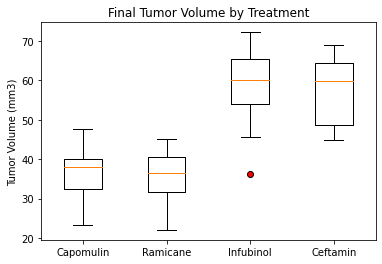

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume by Treatment')
ax.set_ylabel('Tumor Volume (mm3)')
flierprops = dict(marker='o', markerfacecolor='red')
ax.boxplot(tumor_vol_data, flierprops=flierprops)
plt.xticks([1,2,3,4],treatments)
plt.show()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Line and Scatter Plots

Text(0.5, 0, 'Timepoint')

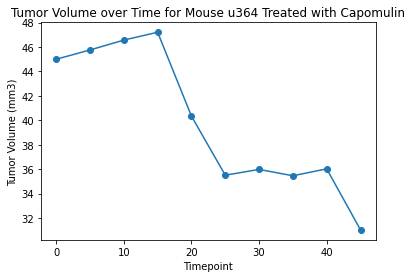

In [434]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = data.loc[data['Mouse ID'] == 'u364']

plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker='o')
plt.title("Tumor Volume over Time for Mouse u364 Treated with Capomulin", wrap=True)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')

C:\Users\nicho\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Text(0.5, 0, 'Tumor Volume (mm3)')

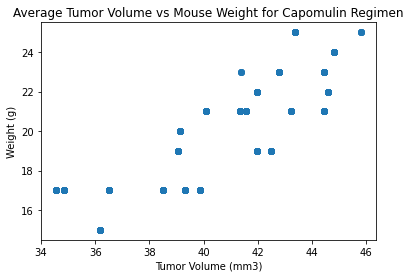

In [33]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_tumor_vol = mice_group_df['Tumor Volume (mm3)'].mean()

capomulin_merge = pd.merge(data, avg_tumor_vol, on='Mouse ID')
capomulin_df = capomulin_merge.loc[capomulin_merge['Drug Regimen'] == 'Capomulin']

mouse_weight = capomulin_df['Weight (g)']
capomulin_df.rename(columns={'Tumor Volume (mm3)_y': 'Avg Tumor Volume'}, inplace=True)

plt.scatter(capomulin_df['Avg Tumor Volume'], capomulin_df['Weight (g)'])
plt.title("Average Tumor Volume vs Mouse Weight for Capomulin Regimen", wrap=True)
plt.ylabel('Weight (g)')
plt.xlabel('Tumor Volume (mm3)')

## Correlation and Regression

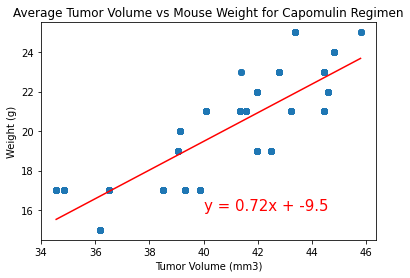

The correlation between both factors is 0.83


In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = capomulin_df['Avg Tumor Volume']
y_values = capomulin_df['Weight (g)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(capomulin_df['Avg Tumor Volume'], capomulin_df['Weight (g)'])
plt.title("Average Tumor Volume vs Mouse Weight for Capomulin Regimen", wrap=True)
plt.ylabel('Weight (g)')
plt.xlabel('Tumor Volume (mm3)')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40,16), fontsize=15, color='red')
plt.show()

correlation = st.pearsonr(x_values, y_values)

print(f"The correlation between both factors is {round(correlation[0],2)}")